### Q1: To rent out properties via Airbnb, What information are needed to gather and prepare?

### Q2: What are the aspects to be considered to impact the listing prices of properties?

### Q3: How well can I predict the listing prices? What aspects correlate well to the listing prices? Create a pricing model.

We will first load the following datasets into dataframe.
- calendar
- listings
- reviews

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
# import RemovingData as t
%matplotlib inline

calendar_df = pd.read_csv('data/calendar.csv')
listings_df = pd.read_csv('data/listings.csv')
reviews_df  = pd.read_csv('data/reviews.csv')


### Dataset Not Used


- 'calendar.csv'

    Since data in 'calendar.csv' only inform us the future vacancy of the properties but it does NOT tell if the properties have been occupied, I remove the dataset from further analysis.

- 'reviews.csv'

    'review.csv' contains the descriptive data and varies from tenants. I remove the dataset from further use


### Q1: To rent out properties via Airbnb, What information are needed to gather and prepare?

To answer the question, we first list all the columns of 'listing_df'

In [301]:
list(listings_df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


### By list dataframe 'calendar_df', the following information needs to be provided to Airbnb.

- 'name', 
- 'summary',
- 'space', 
- 'description', 
- 'experiences_offered', 
- 'neighborhood_overview',
- 'notes', 
- 'transit', 
- 'thumbnail_url', 
- 'medium_url', 
- 'picture_url', 
- 'xl_picture_url', 
- 'host_url', 
- 'host_name', 
- 'host_location', 
- 'host_about', 
- 'host_response_time',
- 'host_thumbnail_url', 
- 'host_picture_url', 
- 'host_neighbourhood',
- 'host_verifications', 
- 'host_has_profile_pic', 
- 'host_identity_verified', 
- 'street', 'neighbourhood', 
- 'neighbourhood_cleansed', 
- 'neighbourhood_group_cleansed', 
- 'city', 
- 'state', 
- 'zipcode', 
- 'market', 
- 'smart_location', 
- 'country_code', 
- 'country', 
- 'property_type', 
- 'room_type', 
- 'accommodates', 
- 'bathrooms', 
- 'bedrooms', 
- 'beds', 
- 'bed_type', 
- 'amenities', 
- 'square_feet', 
- 'price', 
- 'weekly_price', 
- 'monthly_price', 
- 'security_deposit', 
- 'cleaning_fee', 
- 'guests_included', 
- 'extra_people', 
- 'minimum_nights', 
- 'maximum_nights',  
- 'calendar_updated',
- 'license', 
- 'jurisdiction_names', 
- 'instant_bookable', 
- 'cancellation_policy', 
- 'require_guest_profile_picture', 
- 'require_guest_phone_verification', 

### Q2: What are the aspects of a property to be considered could correlate to a property's listing price?

#### Based on 'listing_df' dataframe, I list the following aspects which are correlate to listing prices:

Location
- 'street'
- 'zipcode'

    
Property Details 
- 'property_type'
- 'room_type'
- 'accommodates'
- 'bathrooms'
- 'bedrooms'
- 'beds'
- 'bed_type'
- 'amenities'
- 'square_feet'
- 'cancellation_policy'

Host
- 'host_response_time'
- 'host_response_rate'
- 'host_acceptance_rate'
- 'host_verifications'
- 'host_has_profile_pic'
- 'host_identity_verified'

### Q3: How well can I predict the listing prices? What aspects correlate well to the listing prices? Create a pricing model.

In [302]:
# Create a new dataframe 'raw_df' to import interested columns based on the analysis.

raw_df = listings_df[[
     'id'
  ,  'zipcode'
  ,  'property_type'
  ,  'room_type'
  ,  'accommodates'
  ,  'bathrooms'
  ,  'bedrooms'
  ,  'beds'
  ,  'bed_type'
  ,  'square_feet'
  ,  'cancellation_policy'
  ,  'host_response_time'
  ,  'host_response_rate'
  ,  'host_acceptance_rate'
  ,  'host_has_profile_pic'
  ,  'host_identity_verified'    
  ,  'price'
]]

#### Explore dataset

In [303]:
raw_df.head(5)

,id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,cancellation_policy,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,price
0,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,moderate,within a few hours,96%,100%,t,t,$85.00
1,953595,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,strict,within an hour,98%,100%,t,t,$150.00
2,3308979,98119,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,NaN,strict,within a few hours,67%,100%,t,t,$975.00
3,7421966,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,NaN,flexible,NaN,NaN,NaN,t,t,$100.00
4,278830,98119,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,strict,within an hour,100%,NaN,t,t,$450.00


#### List the column counts for preparing to handle missing value 

In [304]:
raw_df.count()

id                        3818
zipcode                   3811
property_type             3817
room_type                 3818
accommodates              3818
bathrooms                 3802
bedrooms                  3812
beds                      3817
bed_type                  3818
square_feet                 97
cancellation_policy       3818
host_response_time        3295
host_response_rate        3295
host_acceptance_rate      3045
host_has_profile_pic      3816
host_identity_verified    3816
price                     3818
dtype: int64

In [305]:
raw_df.describe()

,id,accommodates,bathrooms,bedrooms,beds,square_feet
count,3.818000e+03,3818.000000,3802.000000,3812.000000,3817.000000,97.000000
mean,5.550111e+06,3.349398,1.259469,1.307712,1.735394,854.618557
std,2.962660e+06,1.977599,0.590369,0.883395,1.139480,671.404893
min,3.335000e+03,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.258256e+06,2.000000,1.000000,1.000000,1.000000,420.000000
50%,6.118244e+06,3.000000,1.000000,1.000000,1.000000,750.000000
75%,8.035127e+06,4.000000,1.000000,2.000000,2.000000,1200.000000
max,1.034016e+07,16.000000,8.000000,7.000000,15.000000,3000.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'accommodates'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'square_feet'}>]], dtype=object)

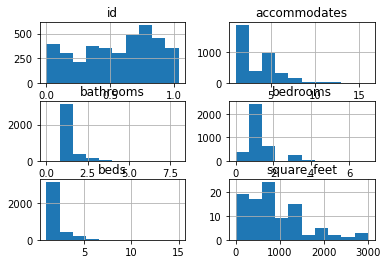

In [306]:
raw_df.hist()

#### Change column type from String to Numeric

    - 'host_response_rate'
    - 'host_acceptance_rate'
    - 'price'

#### Create replace string function to remove % and $ from those columns

In [307]:
def replace_str_to_float_df(df, str_cols, origin_str, replace_str):
    
    for col in str_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), df[col].str.replace(origin_str, replace_str).astype(float)], axis=1)
        except:
            continue
    return df    

In [308]:
replace_str_df = replace_str_to_float_df(raw_df, ['host_response_rate', 'host_acceptance_rate'], '%', '')
replace_str_df = replace_str_to_float_df(replace_str_df, ['price'], '[\$,]', '')
replace_str_df.head()

,id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,cancellation_policy,host_response_time,host_has_profile_pic,host_identity_verified,host_response_rate,host_acceptance_rate,price
0,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,moderate,within a few hours,t,t,96.0,100.0,85.0
1,953595,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,strict,within an hour,t,t,98.0,100.0,150.0
2,3308979,98119,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,NaN,strict,within a few hours,t,t,67.0,100.0,975.0
3,7421966,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,NaN,flexible,NaN,t,t,NaN,NaN,100.0
4,278830,98119,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,strict,within an hour,t,t,100.0,NaN,450.0


#### Change column type from string to Boolean

#### Columns to be changed
- 'host_has_profile_pic'
- 'host_identity_verified'

In [309]:
def replace_str_to_bol_df(df, str_cols, _map):
    
    for col in  str_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), df[col].map(_map).astype(bool)], axis=1)
        except:
            continue
    return df    

In [310]:
_map = {'t' : True, 'f' : False}

In [311]:
replace_bool_df = replace_str_to_bol_df(replace_str_df, ['host_has_profile_pic','host_identity_verified'], _map)

replace_df = replace_bool_df

### Identify missing-value columns

There are total 3818 properties listed from the dataset. 

Column 'id' is just listing an index for each row 
Column 'squre_feet' has the most missing values
Column 'squre_feet' has the highest spread

Those columns below have missing values:

- zipcode                   3811
- property_type             3817
- bathrooms                 3802
- bedrooms                  3812
- beds                      3817
- square_feet                 97
- host_response_time        3295
- host_response_rate        3295
- host_acceptance_rate      3045
- host_has_profile_pic      3816
- host_identity_verified    3816


#### Column 'square_feet' has in sufficient data value

Let find out the proportion of properties in the dataset reported squre feet

In [312]:
prop_square_feet = 1 - replace_df.isnull()['square_feet'].mean()
prop_square_feet

0.02540597171293868

#### Remove 'square_feet' from dataset

Only 2.5% of properties reports 'square feet'. I think it's less relevant for predicting pricing model due to insufficant data. So I remove 'square_feet' 

In [313]:
drop_square_feet_df = replace_df.drop(['square_feet'], axis=1)

In [314]:
new_df = drop_square_feet_df
new_df

,id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,host_response_time,host_response_rate,host_acceptance_rate,price,host_has_profile_pic,host_identity_verified
0,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,moderate,within a few hours,96.0,100.0,85.0,True,True
1,953595,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,strict,within an hour,98.0,100.0,150.0,True,True
2,3308979,98119,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,strict,within a few hours,67.0,100.0,975.0,True,True
3,7421966,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,flexible,NaN,NaN,NaN,100.0,True,True
4,278830,98119,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,strict,within an hour,100.0,NaN,450.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,98107,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,strict,within a few hours,99.0,100.0,359.0,True,True
3814,8902327,98102,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,moderate,within an hour,100.0,100.0,79.0,True,True
3815,10267360,98178,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,moderate,NaN,NaN,NaN,93.0,True,False
3816,9604740,98112,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,moderate,within an hour,100.0,NaN,99.0,True,True


#### Remove duplicated listings

'id' is just the index, I use it to identify if there are duplicated properties in the dataset

In [315]:
len(drop_square_feet_df['id'].unique())

3818

There are 3818 unique id. It makes sure there are no duplicated properties in the dataset

### Manage missing values on those columns

    #### zipcode                   3811
    #### property_type             3817
    #### bathrooms                 3802
    #### bedrooms                  3812
    #### beds                      3817
    #### host_response_time        3295
    #### host_response_rate        3295
    #### host_acceptance_rate      3045
    #### host_has_profile_pic      3816
    #### host_identity_verified    3816

#### Impute 'bathrooms', 'bedrooms', 'beds', 'host_response_rate',  'host_acceptance_rate',  'host_has_profile_pic', 'host_identity_verified' with mean values

In [316]:
# Below are the columns that have missing value. I am going to impute value to those columns in the modelling function

impute_cols = [
    'bathrooms', 
    'bedrooms', 
    'beds', 
    'host_response_rate', 
    'host_acceptance_rate', 
    'host_has_profile_pic', 
    'host_identity_verified']

#### The following columns I am going to categorize
- 'zipcode'
- 'property_type'
- 'room_type'
- 'bed_type'
- 'cancellation_policy'
- 'host_response_time'

In [317]:
# Here is the function for creating dummy value for category columns above

def create_dummy_df(df, cat_cols, dummy_na):
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df    

### It's ready to create function for modelling the prices of properties.

#### It's ready to start create a pricing model to make prediction


In [318]:
# This functin aims to run through a linear regression model based on the input dataframe
# df -> input dataframe
# response_col -> predicting column
# num_cols -> numeric column list
# cat_cols -> category column list
# dummy_na -> dummy column option either 'True' or 'False'

# Note this function also provides the role for imputing missing value and create dummy columns for category columns

def clean_fit_linear_mod(df, response_col, num_cols, cat_cols, dummy_na, test_size=.3, rand_state=42):

    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)    
    
    col_list = df.columns
    
    remove_col_list = list(set(col_list) - set(num_cols) - set(cat_cols))
    remove_col_list.remove(response_col)
    
    df = df.drop(remove_col_list, axis=1)
    
    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)
    
    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)    
    
    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    
    df = df.apply(fill_mean, axis=0)
    
    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]    
    
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)    
    
    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds  = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score  = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test    
    

In [319]:
new_df.columns

Index(['id', 'zipcode', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cancellation_policy',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'price', 'host_has_profile_pic', 'host_identity_verified'],
      dtype='object')

### By choosing the numeric columns below for modelling, I received large error score.
- 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic', 'host_identity_verified'


In [320]:
response_col = 'price'
num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic', 'host_identity_verified']
cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'host_response_time']

test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(new_df, response_col, num_cols, cat_cols, dummy_na=True)

print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5516477262529647.  The rsquared on the test data was -706.3734162929733.


### After excluding 'host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic', 'host_identity_verified', the score improved

In [324]:
response_col = 'price'
num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'host_response_time']

test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(new_df, response_col, num_cols, cat_cols, dummy_na=True)

print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5452553825656292.  The rsquared on the test data was 0.5639307757969543.
